## Explore data patterns using space-time pattern mining

### Introduction

Space-time pattern mining tools use statistics to incorporate the spatial and temporal aspects of your data to help you understand its spatiotemporal trends.

The initial step in space-time pattern mining is creating a space-time cube. A space-time cube aggregates your data into a multidimensional cube data structure (netCDF). The cube aggregates the data into space-time bins with the x and y dimensions representing space and the t dimension representing time.

Three tools in the Space Time Pattern Mining toolbox can be used to create a space-time cube. The tool that you use depends on your data and spatial question.

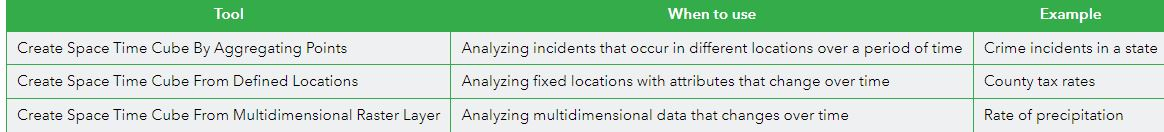

After you create a space-time cube, you can analyze the statistically significant patterns in your data using the following space-time pattern mining tools.


### Emerging Hot Spot Analysis

- Identifying trends in the clustering of point counts or attributes in a space-time cube using the Getis-Ord Gi* statistic and the Mann-Kendall trend test
> ArcGIS Pro Help: [How Emerging Hot Spot Analysis works](https://pro.arcgis.com/en/pro-app/tool-reference/space-time-pattern-mining/learnmoreemerging.htm)

### Local Outlier Analysis

- Identifying statistically significant clusters of high and low values as well as outliers that have values that are statistically different from their neighbors in space and time using the Anselin Local Moran's I statistic
> ArcGIS Pro Help: [How Local Outlier Analysis works](https://pro.arcgis.com/en/pro-app/tool-reference/space-time-pattern-mining/learnmorelocaloutlier.htm)

### Time Series Clustering
- Identifying locations in a space-time cube that are most similar and partitions them into distinct clusters, where members of each cluster have similar time-series characteristics
> ArcGIS Pro Help: [How Time Series Clustering works](https://pro.arcgis.com/en/pro-app/tool-reference/space-time-pattern-mining/learnmoretimeseriesclustering.htm)

The Space Time Pattern Mining toolbox also includes the Time Series Forecasting toolset. This toolset includes four tools that you can use to forecast and estimate future values of a space-time cube and evaluate and compare different forecast models at each location in a space-time cube. To learn more about the Time Series Forecasting toolset, go to ArcGIS Pro Help: An overview of the Time Series Forecasting toolset.Opens in new window
In this exercise, you will create a space-time cube to use with the Emerging Hot Spot Analysis and Local Outlier Analysis tools.

### Scenario
You are assisting in outreach efforts for the Supplemental Nutrition Assistance Program (SNAP). In the previous exercise, you completed a hot spot analysis and an outlier analysis to identify areas with statistically significantly high SNAP participation in the contiguous United States during 2019. To continue your analysis, you will use space-time pattern mining tools to determine how these participation rates have changed over time.



### Create a space-time cube

Before analyzing the spatial and temporal patterns of this data, you must create a space-time cube.

You are analyzing fixed locations (counties) with an attribute (SNAP rates) that changes over time. You will create a space-time cube with input from defined locations.

1. In the Geoprocessing pane, search for and open the Create Space Time Cube From Defined Locations tool.

The input to this tool can be a feature class with repeating shapes or a feature class with one set of shapes and a related table containing the attributes recorded over time. You will use a `feature class of the counties and a related table of SNAP participation rates` for each county from 2010 to 2019.

2. Set the following parameters:

- For Input Features, choose `US_Counties`.
- For Output Space Time Cube, type **SNAP_1Yr_STC**.
- For Location ID, choose CountyID.
- For Related Table, choose `SNAP_County_Rates2010_2019`.
- For Related Location ID, choose `CountyID`.

As shown in the following graphic, `CountyID` is a field in the `US_Counties` feature class and in the `SNAP_County_Rates2010_2019` table. It includes the same values, which are used to relate the yearly participation rates from the `SNAP_County_Rates2010_2019` table to the geographic location of the counties in the `US_Counties` feature class.

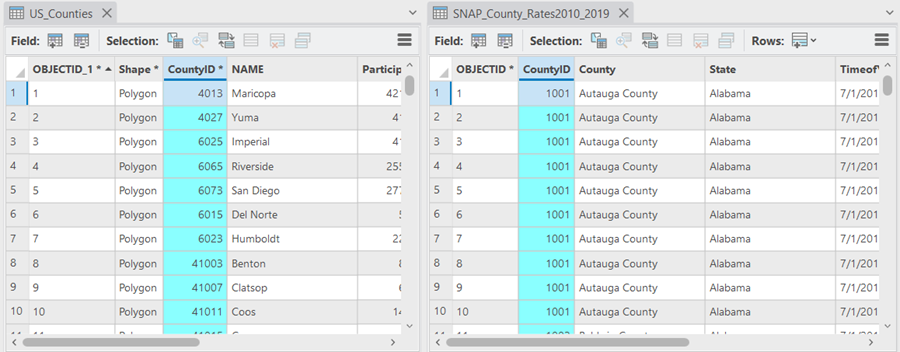

3. For Temporal Aggregation, leave the option unchecked.

Temporal Aggregation is used when the data was collected in more frequent time intervals than your analysis requires. For example, the data was collected monthly, but you are analyzing yearly trends. This analysis is looking at yearly trends in SNAP participation, and the data was collected yearly, so you will not need a temporal aggregation.

4. For Time Field, choose TimeofYear.

Time Field indicates the field from the related table that contains the timestamp that is associated with each record in the table.

5. For Time Step Interval, type 1 for the first parameter and update the second parameter to Years.

Because you did not need a temporal aggregation, the Time Step Interval should match the time intervals of your data (yearly).

6. For Time Step Alignment, leave the default.

Time Step Alignment determines where aggregation, if necessary, will begin and end. You will not need to aggregate the data for this cube. For more information about time-step alignment, go to ArcGIS Pro Help: [How Create Space Time Cube works](https://pro.arcgis.com/en/pro-app/tool-reference/space-time-pattern-mining/learnmorecreatecube.htm).

7. For Variables, in the Field drop-down menu, choose SNAPRate.

8. For Variables, in the Fill Empty Bins With drop-down menu, choose Space-Time Neighbors.

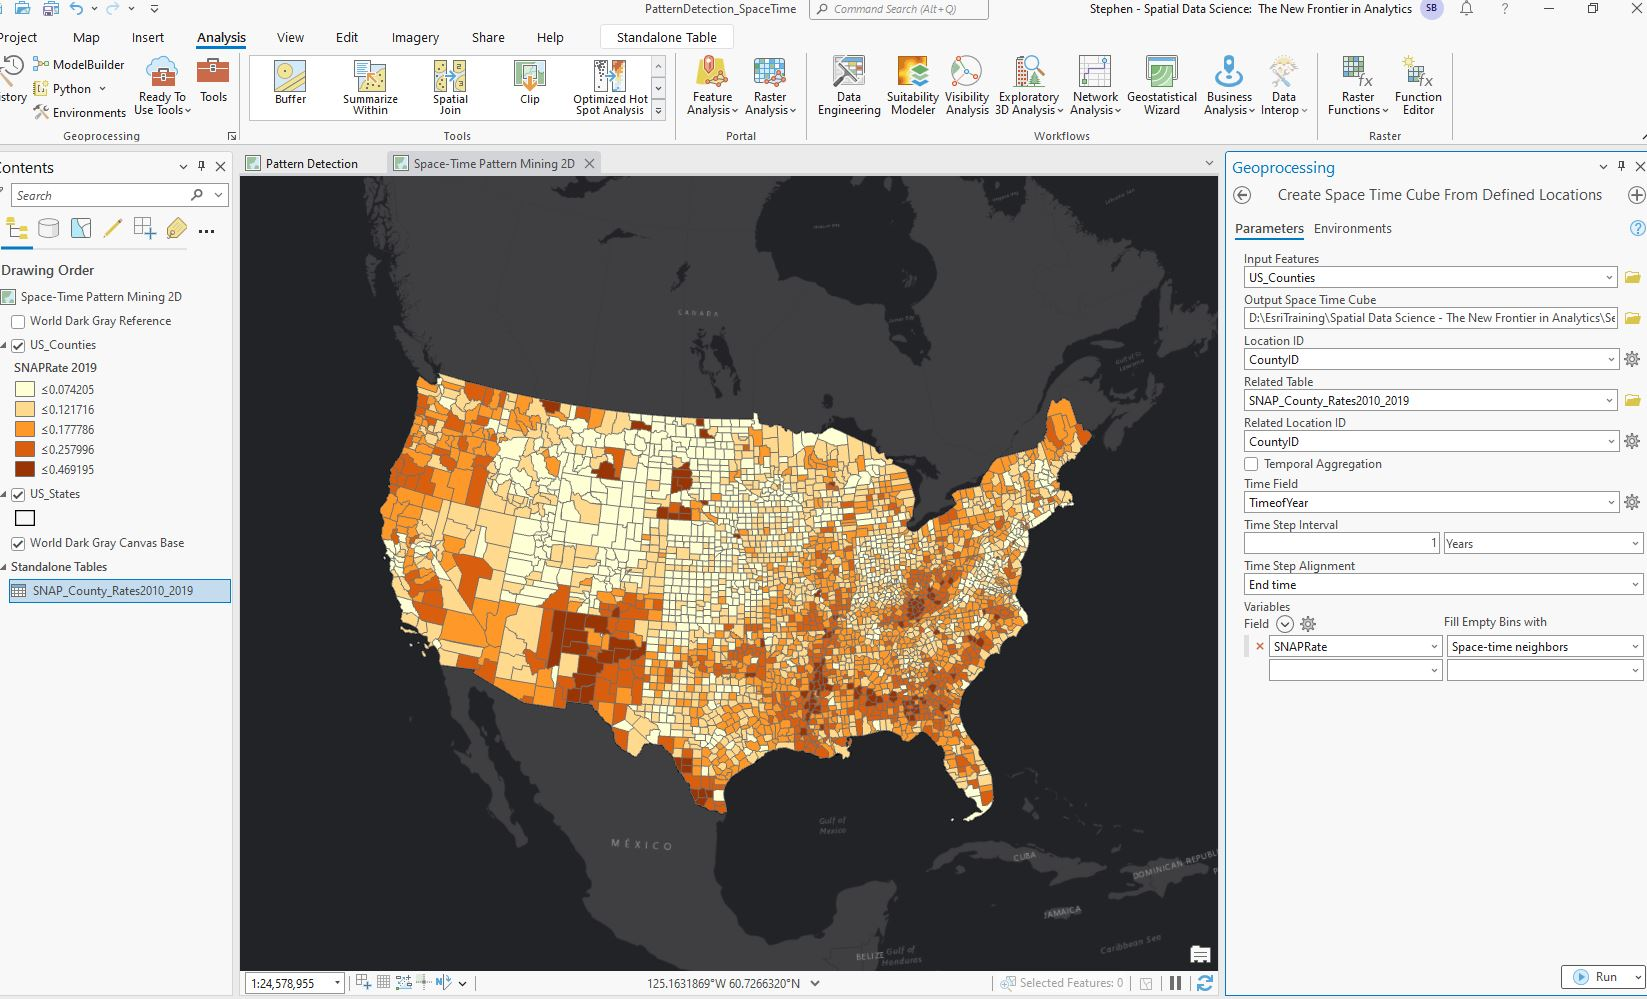

Variables are the fields with the attribute values that change over time. If your data is missing a value for a specific bin, you can specify what to do with that bin. This decision depends on your data and analysis question. If you are analyzing crime and there is an empty bin, that may mean no crimes took place at that location during that specific time, or it could mean that no data was collected. If the empty bin represents an absence of crime, the bin should be filled with a value of zero. If the empty bin represents the absence of data, the bin should be dropped or filled by averaging its spatial and/or temporal neighbors.

9. Click Run.

The tool creates a netCDF file that does not display in the map, but it is saved to the location that you specified in the Output Space Time Cube parameter. You can find the file path for the cube in the Output Space Time Cube parameter after running the tool. NetCDF (network Common Data Form) is a file format designed to support the creation, access, and sharing of multidimensional scientific data. For more information about the netCDF file type, go to ArcGIS Pro Help: [What is netCDF data?](https://pro.arcgis.com/en/pro-app/latest/help/data/multidimensional/what-is-netcdf-data.htm).

The tool message window will inform you that the tool completed successfully but with warnings. You will review the warnings to gather more information.

10. Click View Details.


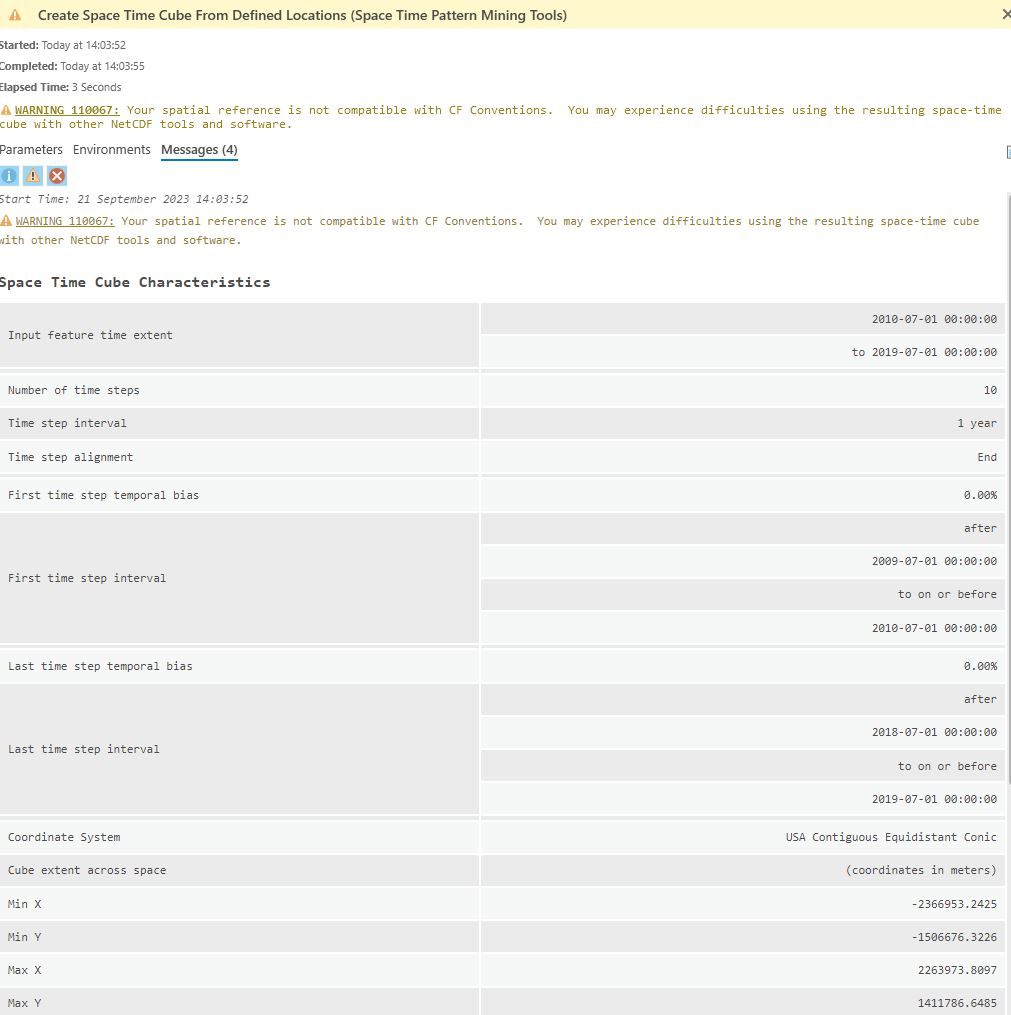
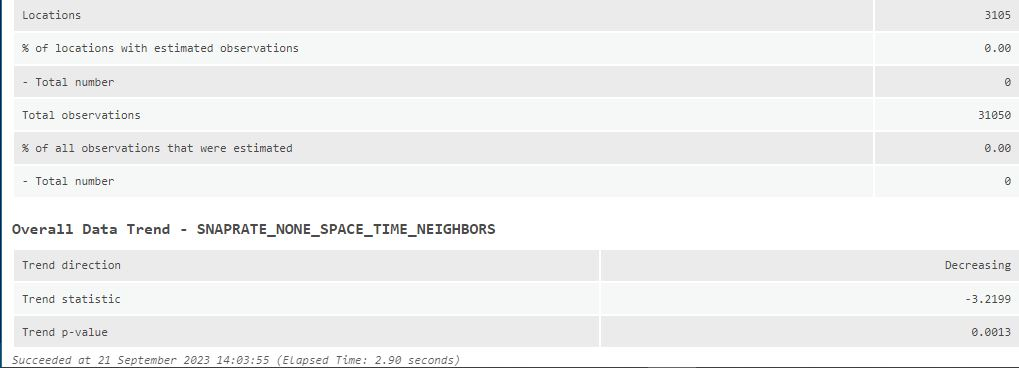

The warning indicates that the spatial reference is not compatible with CF Conventions. The space-time cube that you created will not be used by other netCDF software, so the warning does not affect this analysis. If you did want to use a space-time cube with other netCDF tools and software, you could use a coordinate system such as `USA_Contiguous_Lambert_Conformal_Conic`. If needed, you can click the warning number in the message window for more help and information. 

11. Close the tool message window.


### Visualize a space-time cube in 2D

You can visualize the results of the space-time cube in 2D and 3D. Each visualization provides different insight into your data. In this step, you will visualize the results of the space-time cube in 2D.

1. In the Contents pane, turn off the US_Counties layer.

2. In the Geoprocessing pane, click the Back button , and then search for and open the Visualize Space Time Cube In 2D tool.

3. For Input Space Time Cube, click the Browse button Browse.

4. Browse to ..\EsriTraining\PatternDetection_SpaceTime.

5. Select `SNAP_1Yr_STC.nc` and click OK.

>Note: The input space-time cube (netCDF file) is found in the file path that you specified in the Output Space Time Cube parameter from the previous geoprocessing tool.

6. For Cube Variable, choose `SNAPRATE_NONE_SPACE_TIME_NEIGHBORS`.

This Cube Variable parameter is the variable, or variables, that you specified when creating the cube.

7. For Display Theme, choose Trends.

>Note: Display Theme options vary based on the space-time pattern mining analyses that you have completed using the cube. For a list of all possible display themes, go to ArcGIS Pro Help: Visualize Space Time Cube in 2D (Space Time Pattern Mining)Opens in new window.

8. Check the Enable Time Series Pop-ups box.

9. For Output Features, type **SNAP_1Yr_STC_Trends2D**.

10. Click Run.

The Trends display theme uses the Mann-Kendall statistic to identify areas that have increased rates (purple) or decreased rates (green) of SNAP participation over time. The varying shades of these colors indicate how confident that you can be that these increased and decreased trends are not random and represent meaningful patterns.

11. Zoom to an area on the map, and then click one of the counties.

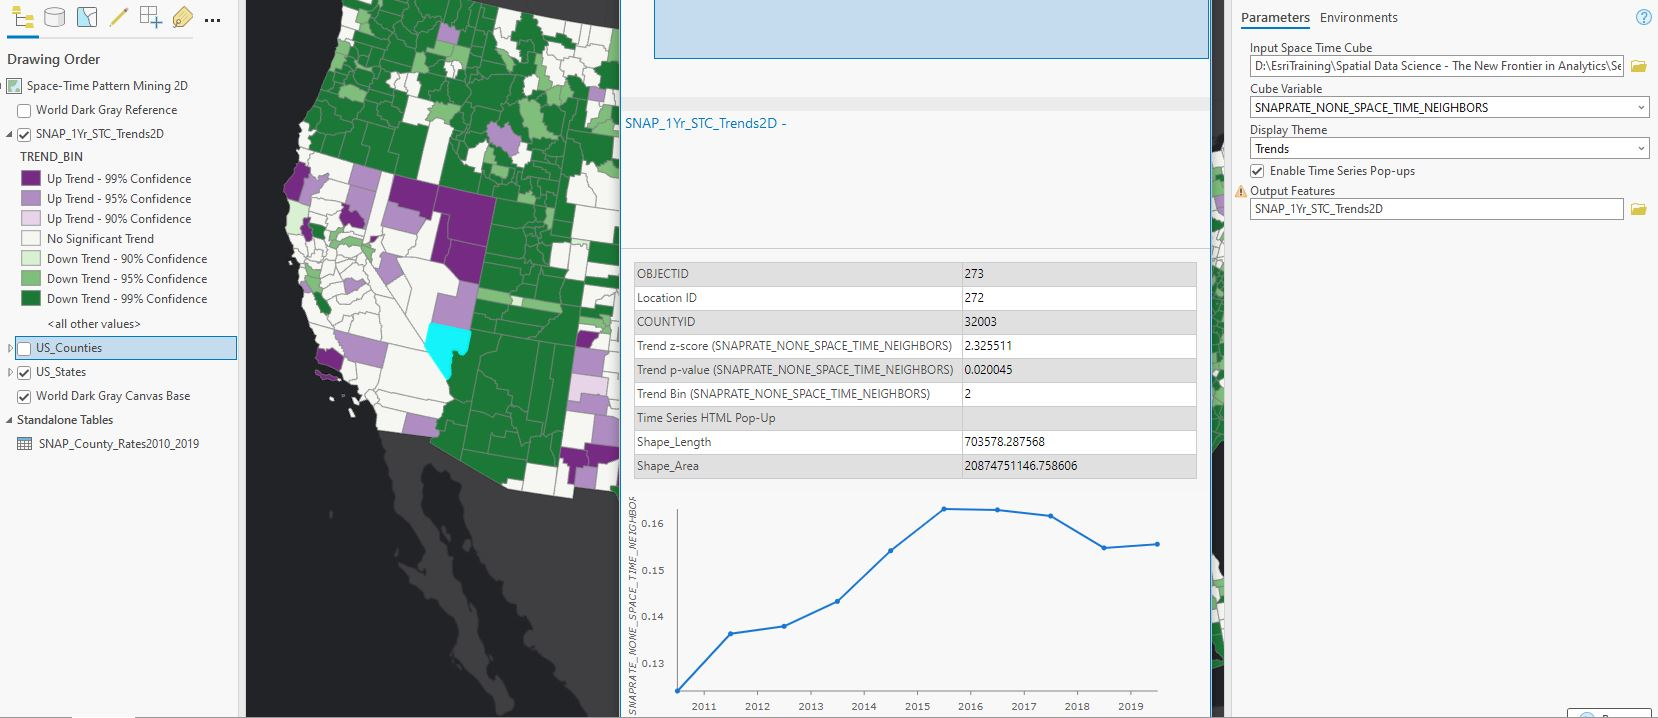

A time-series pop-up window appears. Each time-series pop-up includes a chart that visualizes the time-series trend for a particular county. You can use the chart to better understand the overall trend of a county's SNAP participation and identify its yearly SNAP participation rates.

12. Close the pop-up window.

### Visualize a space-time cube in 3D

To visualize the cube in 3D, you will use a scene. Scenes allow you to visualize your data and analyze geographic information in an interactive 3D environment.

1. In the Catalog pane, under Maps, right-click Space-Time Pattern Mining 3D and choose Open Local View.

A scene that is zoomed to the contiguous United States appears.

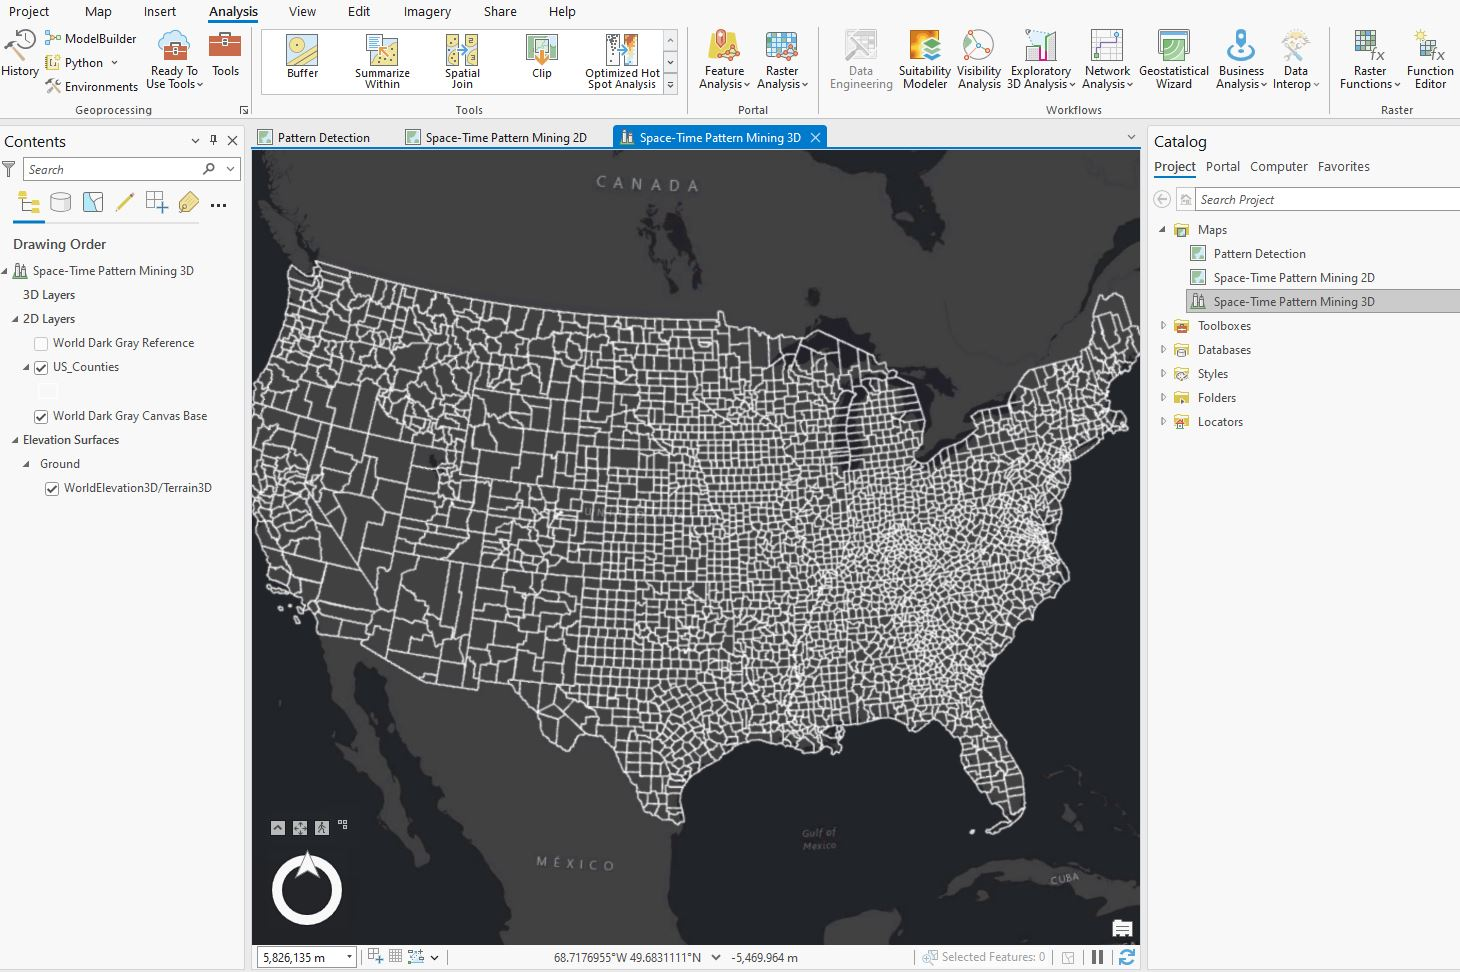

2. In the Geoprocessing pane, search for and open the Visualize Space Time Cube In 3D tool, and then set the following parameters:

- Input Space Time Cube: SNAP_1Yr_STC.nc (Hint: Use the Browse button.)
- Cube Variable: SNAPRATE_NONE_SPACE_TIME_NEIGHBORS
- Display Theme: Value
- Output Features: SNAP_1Yr_STC_Value3D

3. Click Run.

>Note: It may take a few minutes for the 3D layer to appear. Processing time for 3D visualization can be affected by a few factors, including your computer's graphics card and the number of features to display. If the layer does not display in a few minutes, try zooming in to the screen so that there are fewer features to display at one time.

A 3D layer of SNAP participation rates appears in the scene. You can zoom and pan the scene to examine individual counties.

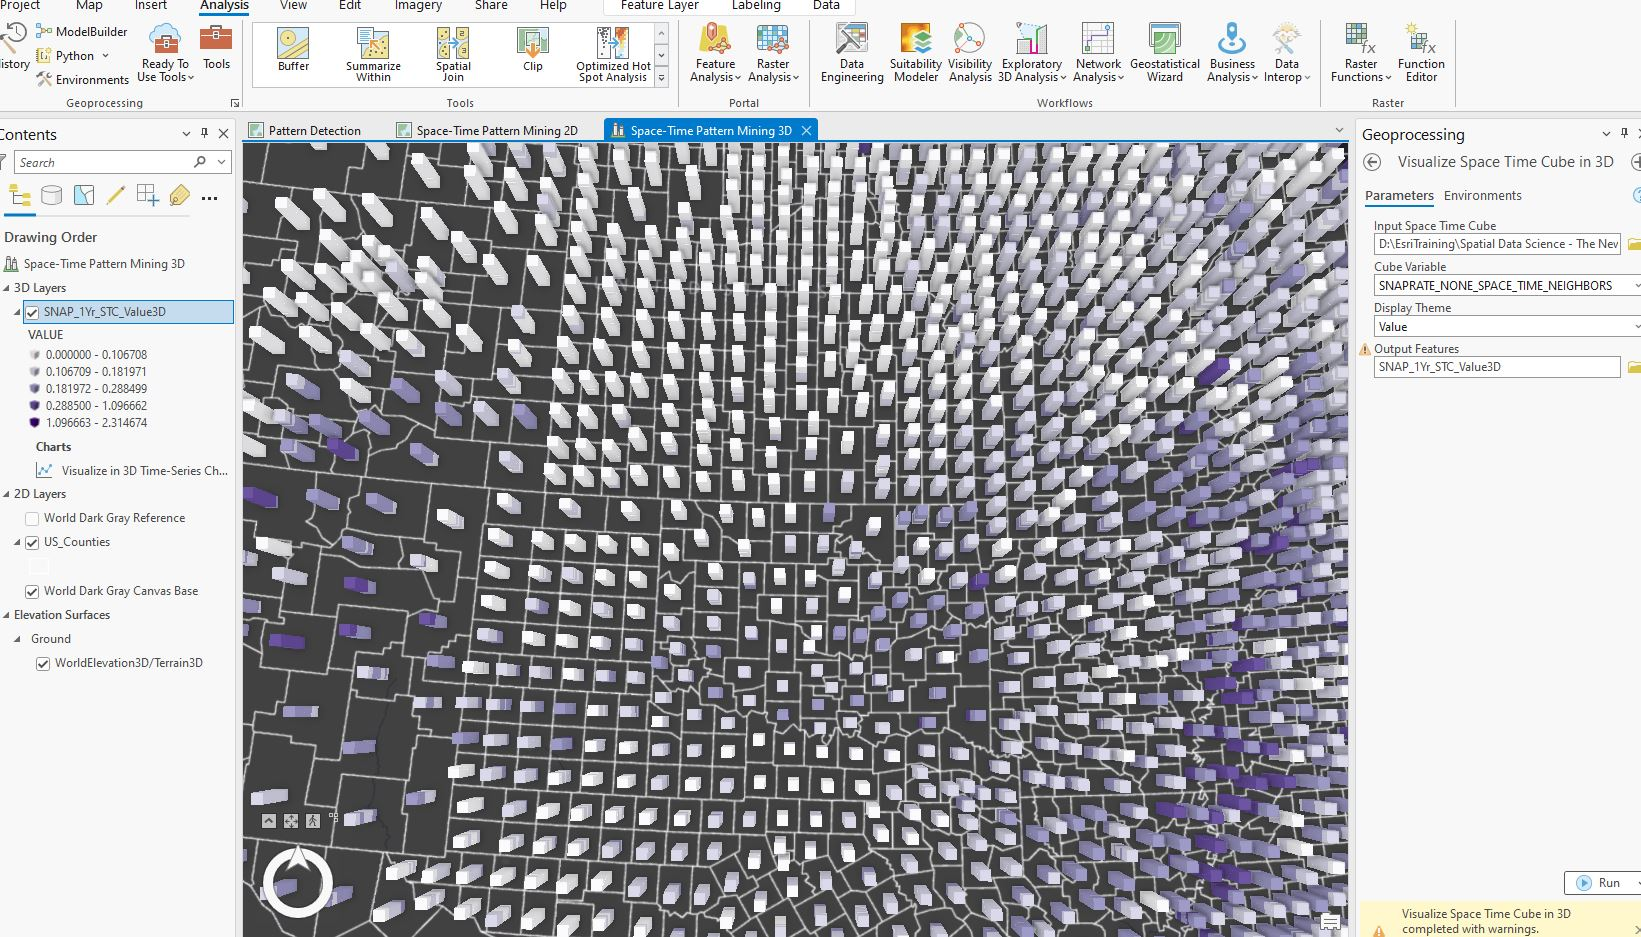

4. From the Map tab, in the Navigate group, click Bookmarks and choose View Values.

Each column represents the SNAP participation rates for a county over time.

5. In the scene, click one of the bins.

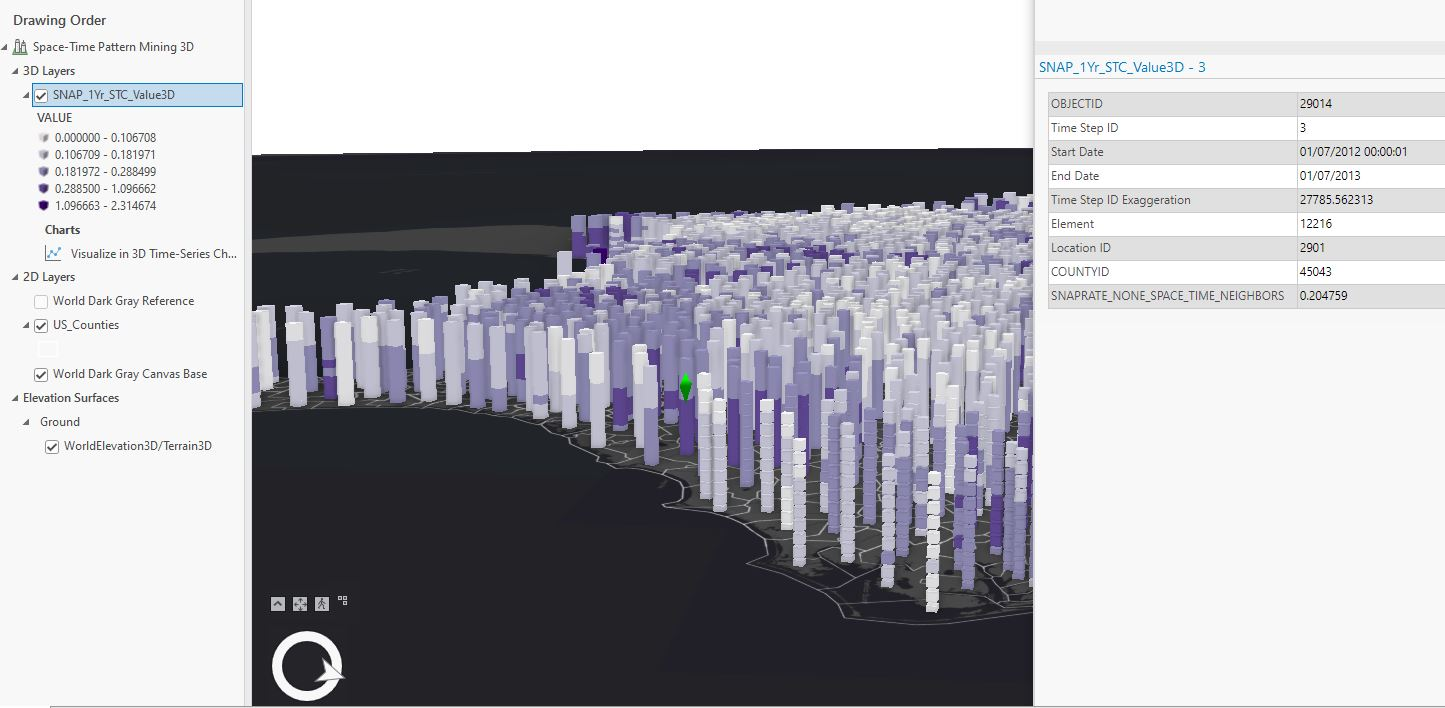

A pop-up window appears that includes the county information and SNAP participation rate for the specified year.

Creating and visualizing a space-time cube transforms your spreadsheet of data into an interactive 3D view. You can easily see the SNAP participation rates for each county and how the rates have changed over time. Next, you will determine whether there is statistically significant clustering in this data.

6. Close the pop-up window, and then save the project.

### Run an emerging hot spot analysis

you will use an emerging hot spot analysis to analyze a feature's spatial and temporal neighbors to determine whether the feature and its neighborhood are statistically significantly different from the study area. This analysis will help you determine where and when there is statistically significant clustering of high and low SNAP participation rates.

1. At the top of the scene view, click the Space-Time Pattern Mining 2D map tab.

2. In the Contents pane, turn off the `SNAPRate_1Yr_STC_Trends2D` layer.

3. If necessary, from the Map tab, in the Navigate group, click Bookmarks and choose Contiguous US.

4. In the Geoprocessing pane, search for and open the Emerging Hot Spot Analysis tool.

5. Set the following parameters:

- For Input Space Time Cube, browse to the SNAP_1Yr_STC.nc file and select it.
- For Analysis Variable, choose SNAPRATE_NONE_SPACE_TIME_NEIGHBORS.
- For Output Features, type SNAP_1Yr_STC_EHS.
- For Conceptualization Of Spatial Relationships, confirm that Fixed Distance is selected.
- For Neighborhood Distance, set the fields to 75 Kilometers.
>Tip: If you are comparing the results of this tool to other space-time pattern mining or pattern detection tools, use the same Conceptualization Of Spatial Relationships parameter value and distance band to ensure that the analysis parameters are consistent.

6. For Number Of Spatial Neighbors, leave the field blank.

The Number Of Spatial Neighbors parameter is used in conjunction with the Conceptualization Of Spatial Relationships parameter to define each feature's neighborhood. It is typically used with the K Nearest Neighbors Conceptualization Of Spatial Relationships. If used with fixed distance, the assigned distance band is used to define neighborhoods unless the band does not reach the specified number of spatial neighbors. In these cases, the distance band will extend to reach the specified number of spatial neighbors.

7. For Neighborhood Time Step, leave the default.

The Neighborhood Time Step parameter defines the temporal neighborhood. Using a time step of 1 includes the feature, its neighborhood, and the feature and neighborhood from the previous year.

8. For Define Global Window, leave the default.

In a hot spot analysis, a feature and its neighborhood are compared to the study area. With the Emerging Hot Spot Analysis tool, you can compare the feature and its neighborhood to the entire cube, bins within the neighborhood time step, or bins within the same time step. For more information, go to ArcGIS Pro Help: [Emerging Hot Spot Analysis (Space Time Pattern Mining)](https://pro.arcgis.com/en/pro-app/tool-reference/space-time-pattern-mining/emerginghotspots.htm).

9. Click Run.

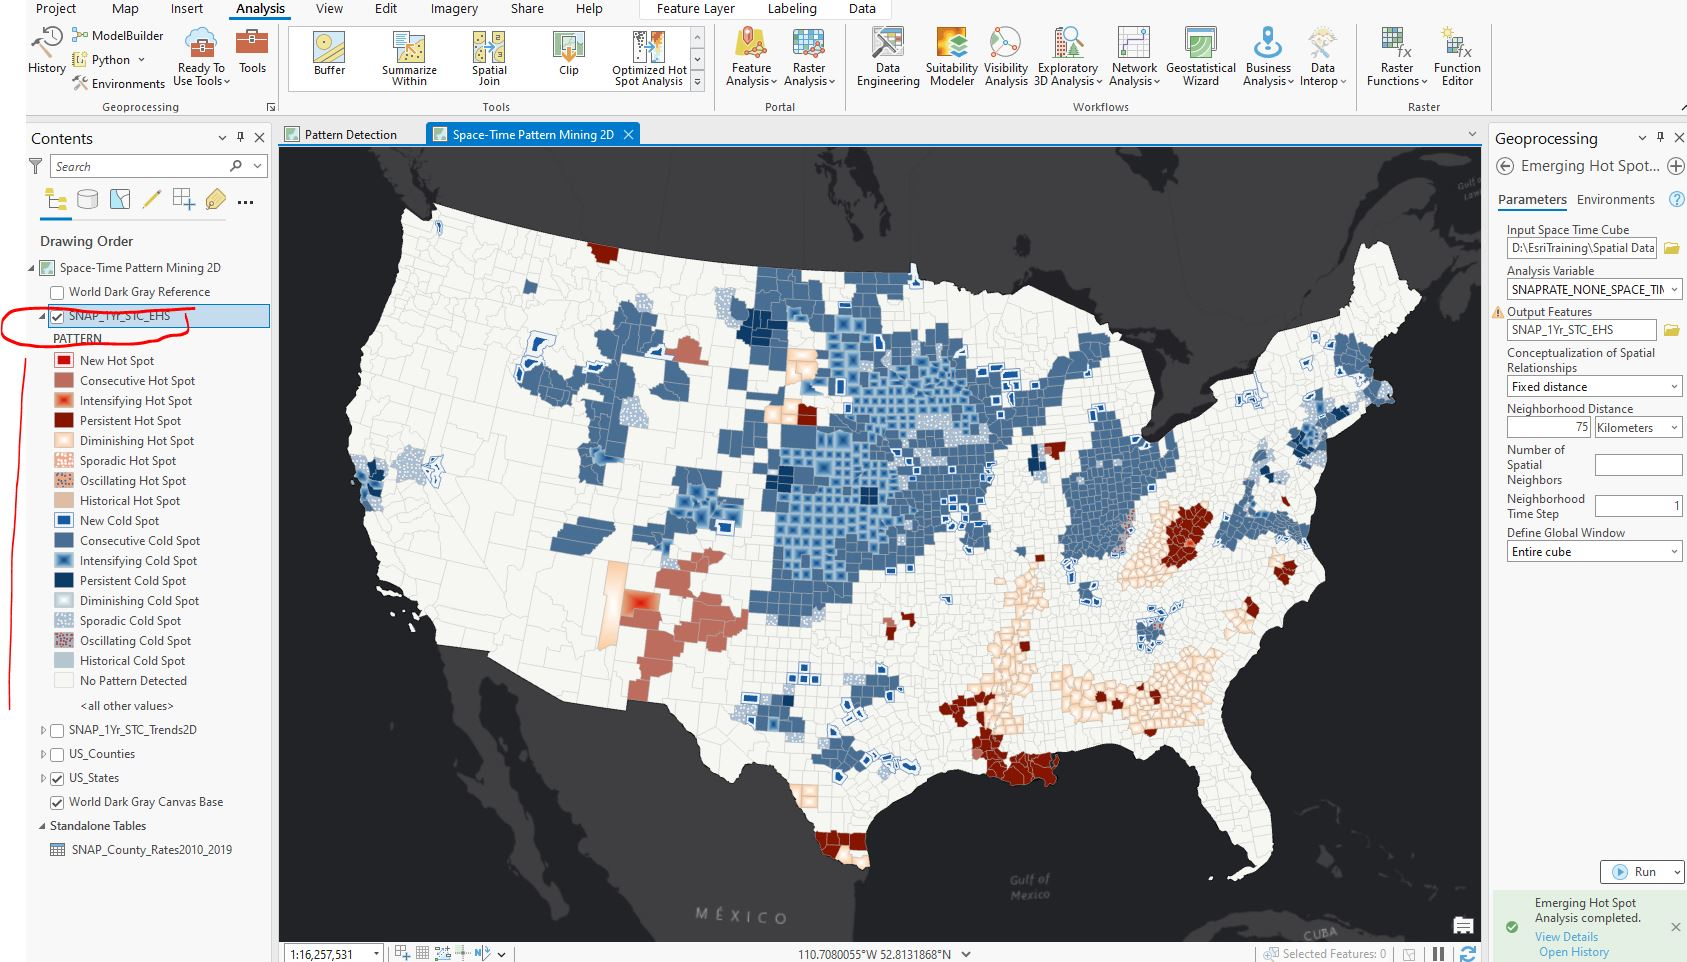

Each location is evaluated based on its hot spot and cold spot results each year and then categorized (intensifying hot spot, persistent cold spot, and so on) to help you interpret the results. The layer symbology represents the different categories.

10. Open a web browser tab and go to ArcGIS Pro Help: [How Emerging Hot Spot Analysis works](https://pro.arcgis.com/en/pro-app/tool-reference/space-time-pattern-mining/learnmoreemerging.htm).

11. Review the table on this web page, and learn about the different symbology options, pattern names, and definitions.

>Q. In the 2D map in ArcGIS Pro, which patterns can you detect for the emerging hot spot analysis?
>A. The Emerging Hot Spot Analysis categories are based on patterns detected over time. Next, you will visualize this information in 3D.

12. Close the web browser tab and return to ArcGIS Pro.

13. Save the project.

### Visualize the emerging hot spot analysis result in 3D

You can visualize the result from the emerging hot spot analysis in 3D to see why each location was assigned a specific category. You can also use 3D visualization to learn more about a specific area of interest.

1. At the top of the map view, click the Space-Time Pattern Mining 3D scene tab.

2. In the Contents pane, turn off the SNAP_1Yr_STC_Value3D layer.

3. From the Map tab, zoom to the Contiguous US bookmark.

4. From the Analysis tab, in the Geoprocessing group, click History.

>Note: ArcGIS Pro provides a History pane to access all the geoprocessing tools that you have used in this ArcGIS Pro project. You can double-click a tool to reopen it with the parameters used in that analysis. This workflow can save you time when running consecutive analyses that require the same tool with many of the same parameter values.

5. In the History pane, double-click the previously run Visualize Space Time Cube In 3D tool to open it.

Your Input Space Time Cube and Cube Variable parameters will remain the same as the last run, but you will update the other two parameters.

6. In the Geoprocessing pane, update the following parameters:

- Display Theme: Hot And Cold Spot Results
- Output Features: SNAP_1Yr_STC_EHS3D

7. Click Run.

A 3D layer of hot and cold spots appears in the scene. Each column indicates whether there were clusters of high or low SNAP participation rates for each year. By comparing the 2D and 3D analysis results, you can gain a better understanding of the yearly trends that contributed to each category.

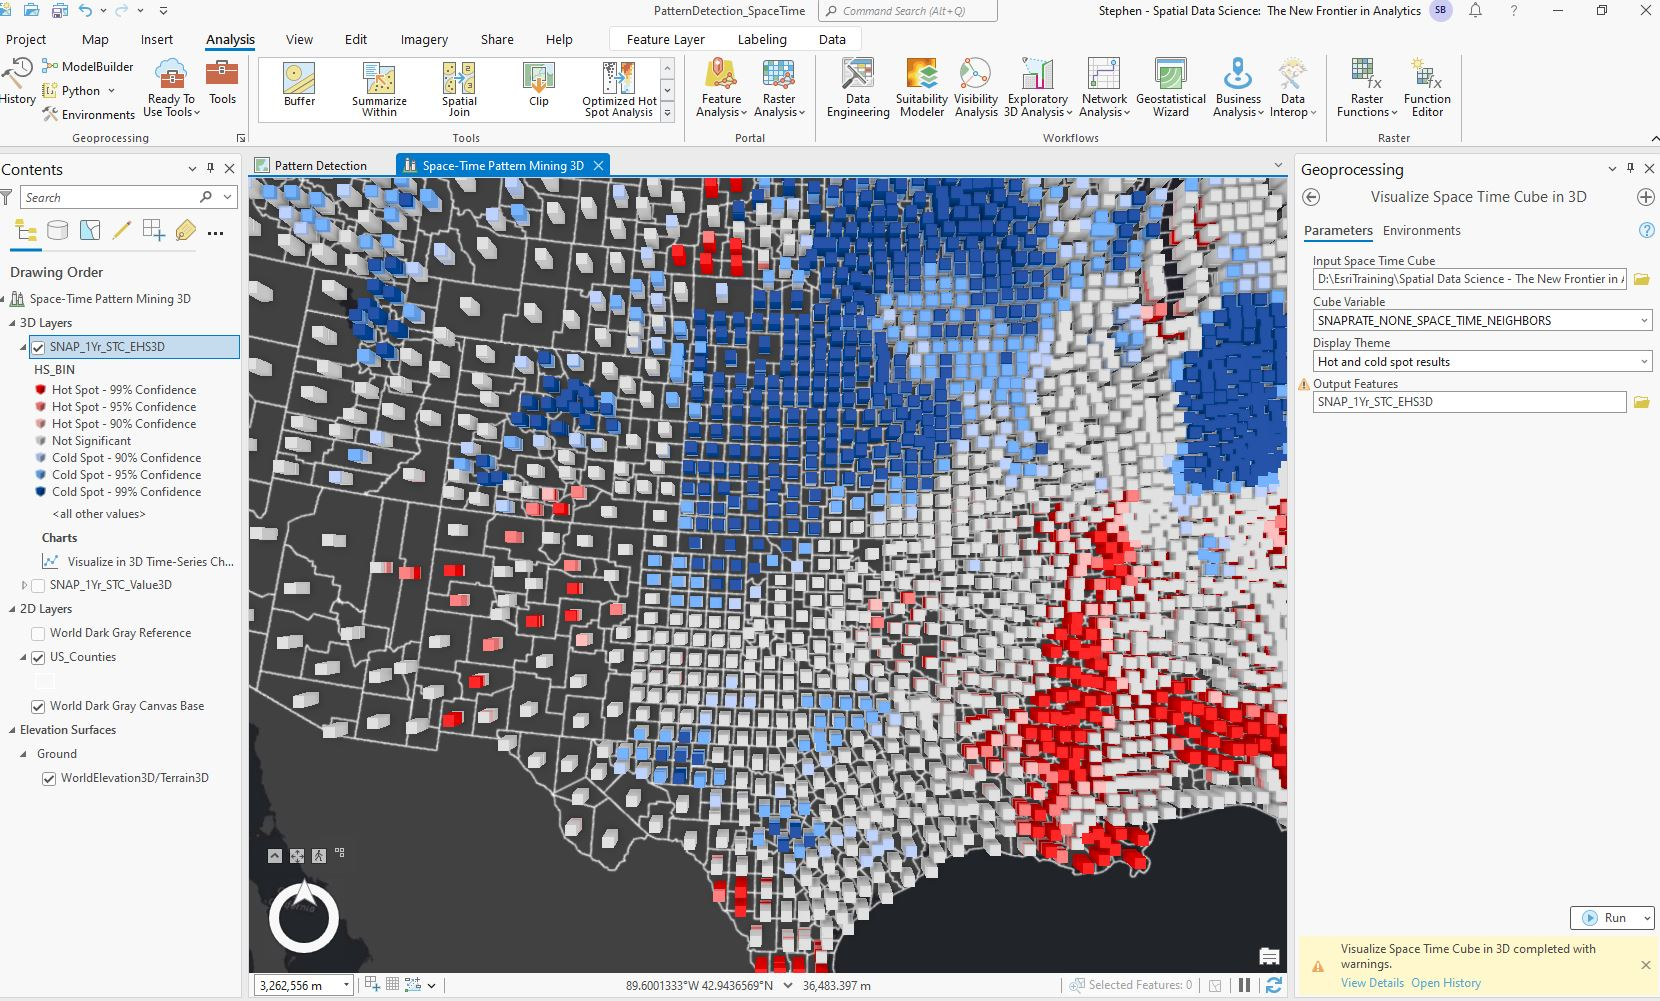

8. At the top of the scene view, right-click the Space-Time Pattern Mining 3D scene tab and choose New Vertical Tab Group.

The map and scene appear side by side. You can link these views so that moving one view will automatically update the other view.

9. From the View tab, in the Link group, click the Link Views down arrow and choose Center And Scale.

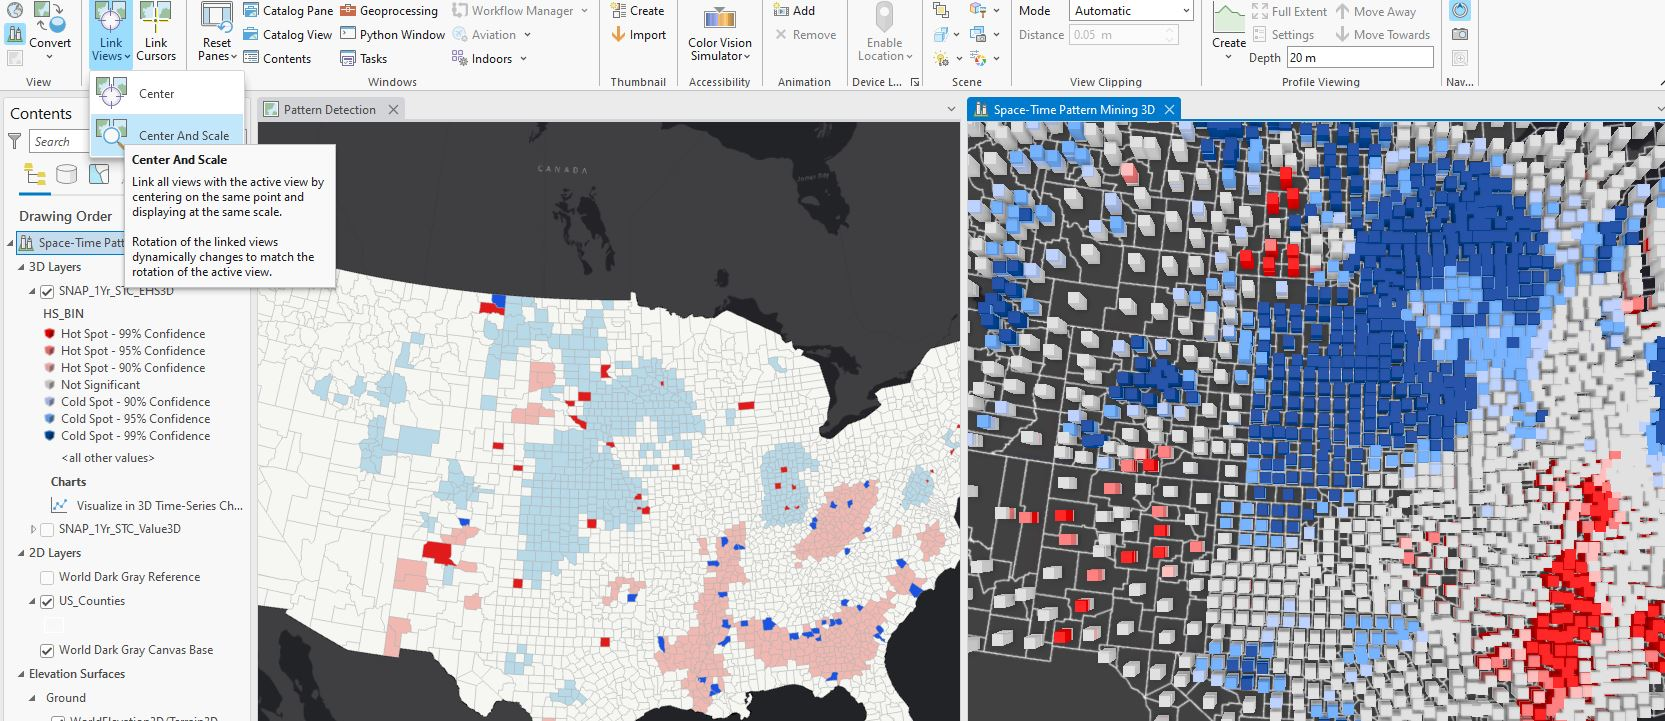

10. From the Map tab, zoom to the Hot Spots bookmark.

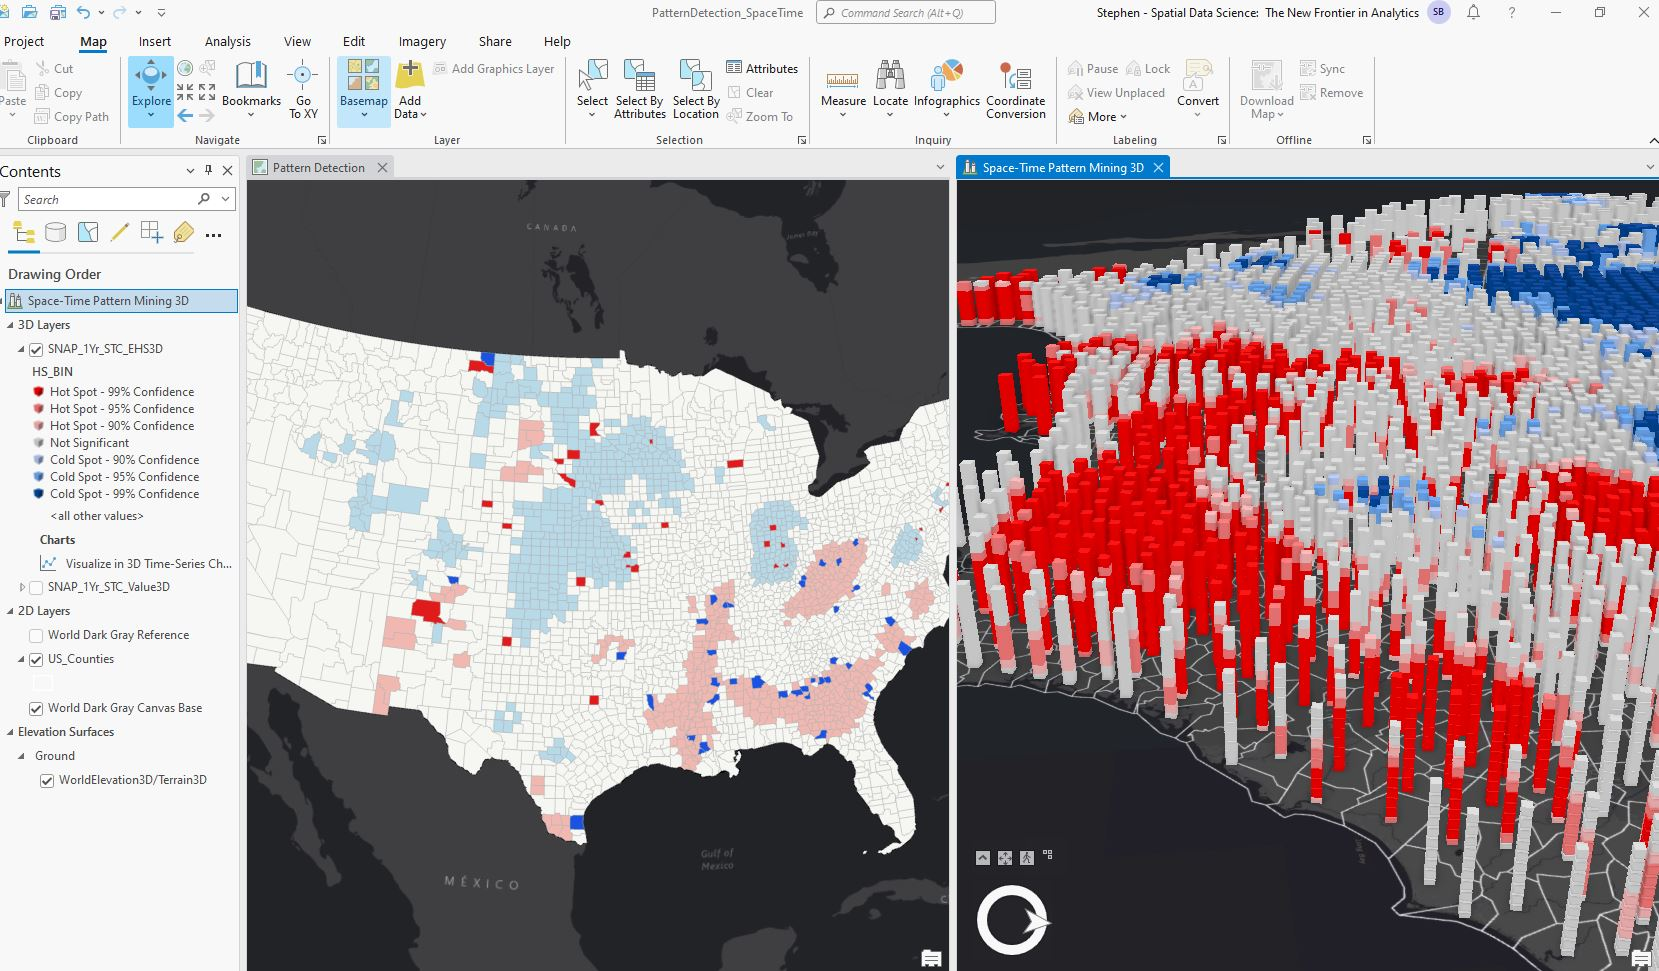

>Note: Your views may differ slightly from the View Result graphic.

The 3D scene view allows you to see the yearly values for hot spots. This information can provide additional insight into your data. Based on these patterns, you may want to investigate areas with consecutive or emerging hot spots to see whether these areas require additional resources that can improve access to healthy foods.

Before you continue, you will unlink the map and scene and then set each view to display separately.

11. To unlink your map and scene, from the View tab, in the Link group, click Link Views.

12. To no longer view the map and scene side by side, right-click the Space-Time Pattern Mining 3D scene tab and choose Move To Previous Tab Group.

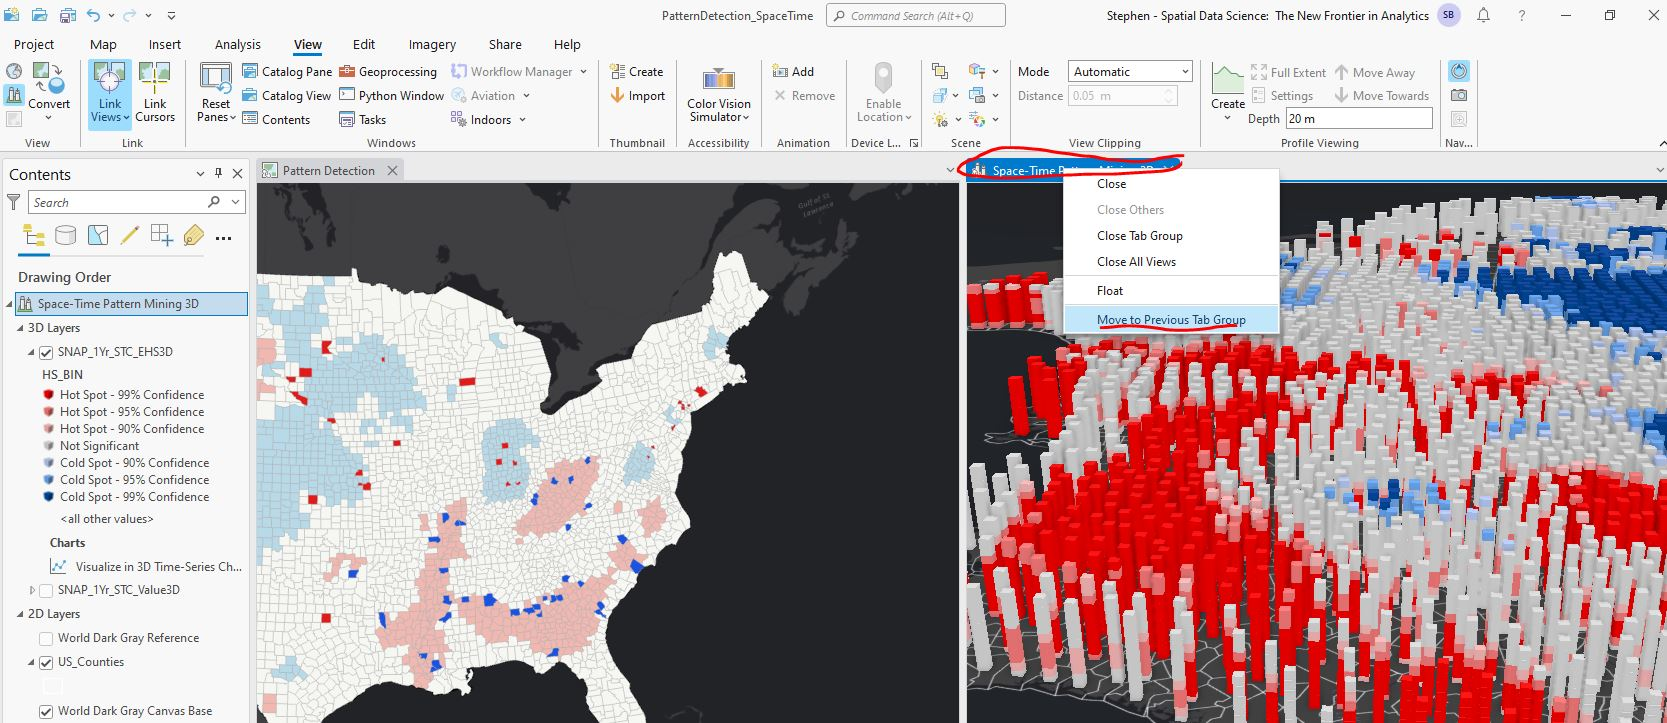

13. Save the project.

### Run a local outlier analysis

Running a local outlier analysis with the result from the emerging hot spot analysis can help you determine which areas are statistically significantly different from their neighbors over time.

1. View the Space-Time Pattern Mining 2D map.

2. In the Contents pane, turn off the SNAP_1Yr_STC_EHS layer.

3. Zoom to the Contiguous US bookmark.

4. In the Geoprocessing pane, search for and open the Local Outlier Analysis tool.

5. Set or confirm the following parameters:

- Input Space Time Cube: SNAP_1Yr_STC.nc
- Analysis Variable: SNAPRATE_NONE_SPACE_TIME_NEIGHBORS
- Output Features: SNAP_1Yr_STC_LO
- Conceptualization Of Spatial Relationships: Fixed Distance
- Neighborhood Distance: 75 Kilometers

6. Leave the remaining defaults and click Run.

>Tip: If you are comparing the results of this tool to other space-time pattern mining tools, use the same parameters to ensure that the analysis is consistent.

>Note: The permutations in the Local Outlier Analysis tool compare your data values to a set of randomly generated values. Therefore, your results may vary slightly from the following graphic.

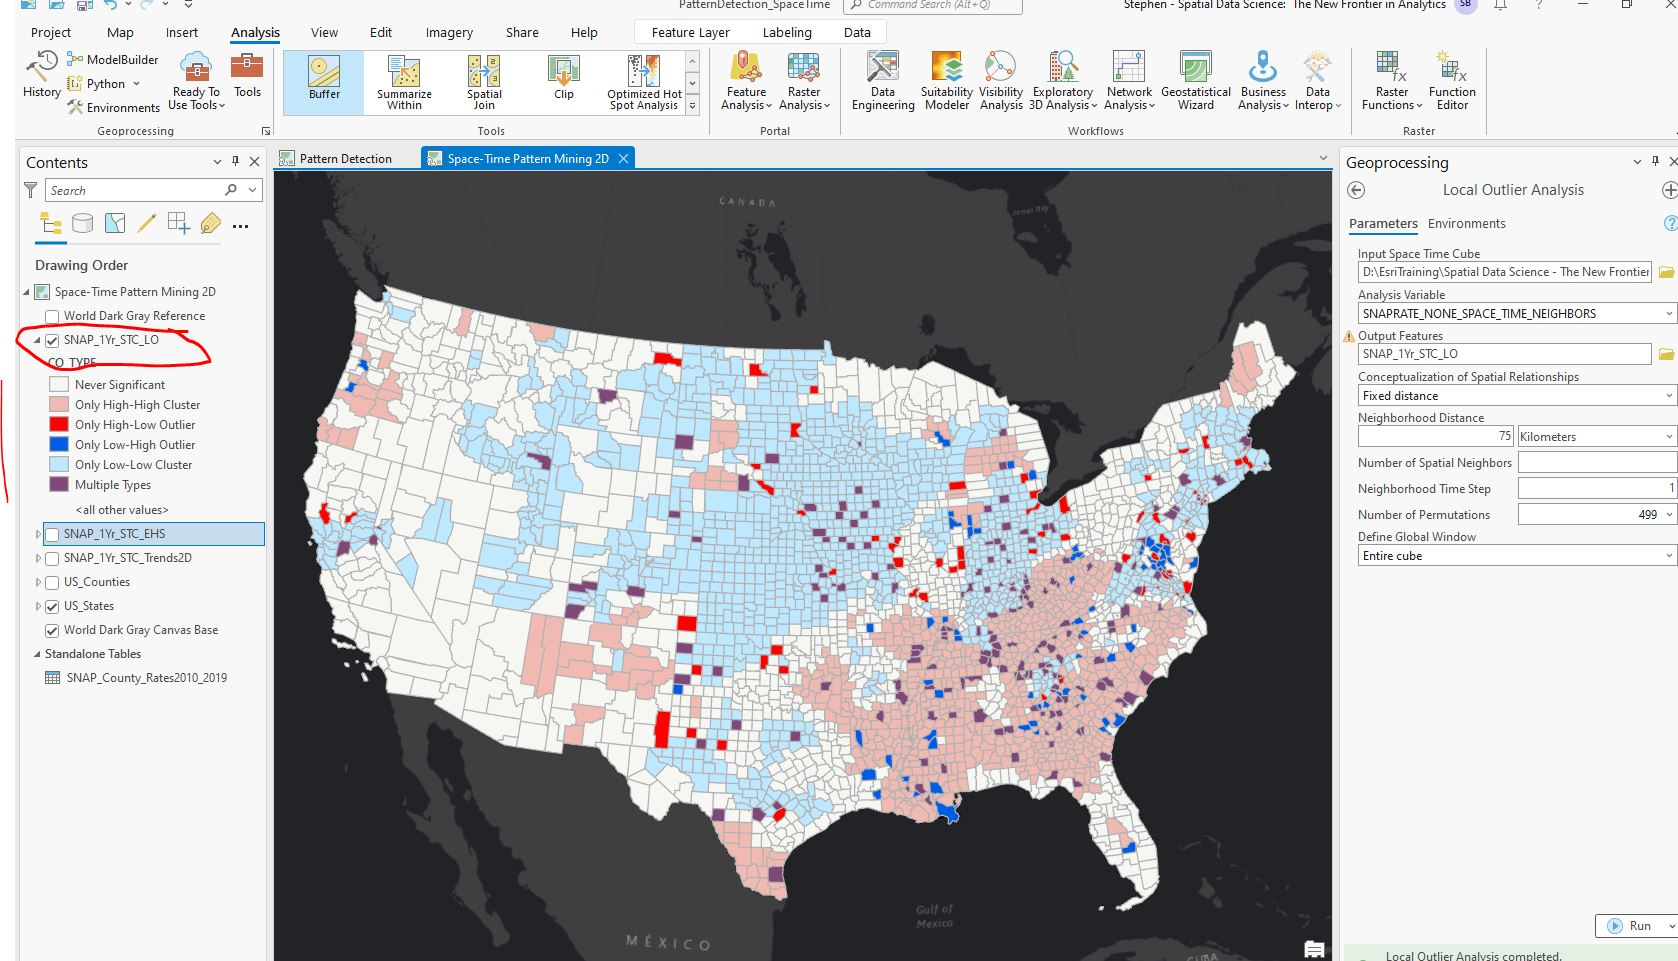

Each feature is evaluated and then categorized (High-High cluster, High-Low outlier, and so on) to help you interpret the results. Clusters indicate areas where the only statistically significant type throughout time has been a high or low cluster. Outliers indicate areas where the only statistically significant type throughout time has been a High-Low outlier or a Low-High outlier. Multiple types indicate areas where there have been multiple types of statistically significant clusters or outliers throughout time.

### Visualize the local outlier analysis result in 3D

In this step, you will visualize the cube in 3D to examine the outliers, determining what years and areas were statistically different from their neighbors.

1. View the Space-Time Pattern Mining 3D scene.

2. In the Contents pane, turn off the SNAP_1Yr_STC_EHS3D layer.

3. From the Map tab, zoom to the Contiguous US bookmark.

4. In the History pane, double-click the previously run Visualize Space Time Cube In 3D tool to open it, and then update the following parameters:

- Display Theme: Cluster And Outlier Results
- Output Features: SNAP_1Yr_STC_LO3D

5. Click Run.

A 3D layer of clusters and outliers appears in the scene.

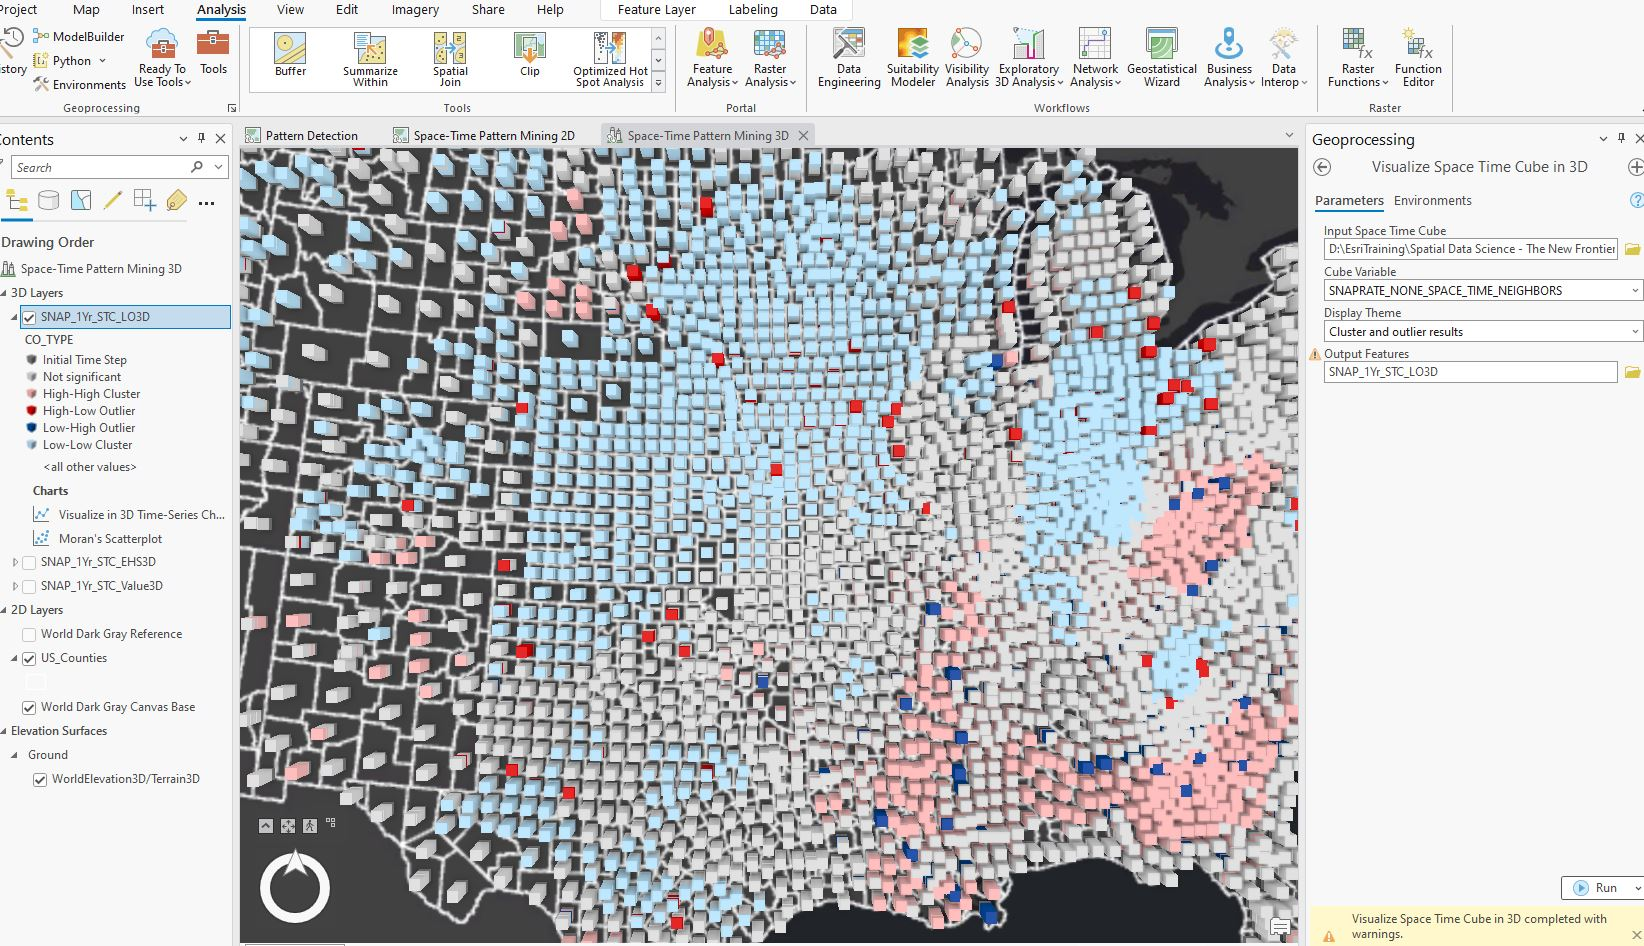

6. Click the Space-Time Pattern Mining 2D map tab.

7. In the Contents pane, right-click the SNAP_1Yr_STC_LO layer and choose Copy.

8. Click the Space-Time Pattern Mining 3D scene.

9. In the Contents pane, right-click Space-Time Pattern Mining 3D and choose Paste.

10. Zoom to the Outliers bookmark.

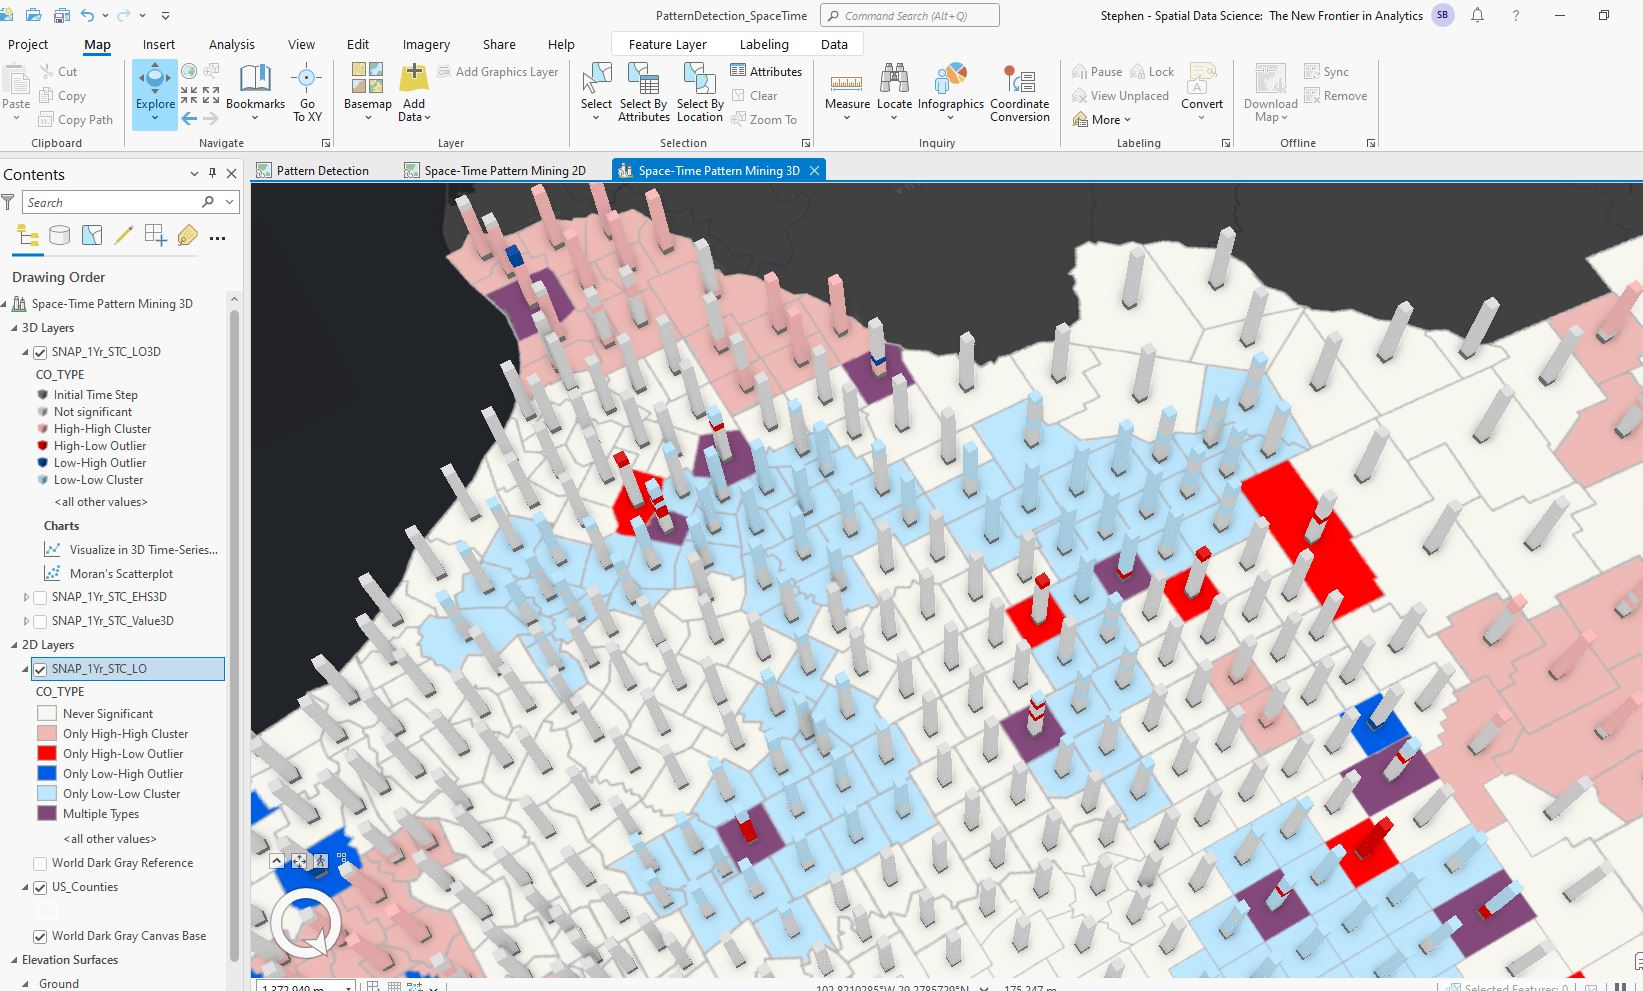

Adding the 2D Local Outlier Analysis result layer to the 3D Local Outlier Analysis layer can help you gain a better understanding of the yearly trends that contributed to each category. This information provides more insight into your data. For example, you may want to investigate these outliers in further detail to determine whether they are the result of environmental factors, socioeconomic changes, outreach efforts, or a combination of the three.

You ran the Emerging Hot Spot Analysis and Local Outlier Analysis tools to help you evaluate how SNAP participation rates have changed over time. This information can help in the allocation of SNAP resources to areas of higher food insecurities. The results can help drive the decision to distribute resources in a more efficient and equitable way.

11. Save the project and exit ArcGIS Pro.